# Dataset

## Importing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Importing our dataset
df = pd.read_csv(r"C:\Users\Mohit\Downloads\Titanic-Dataset.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring the Data

In [8]:
print("Shape of the data:- ",df.shape)

Shape of the data:-  (891, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Columns or Features Description¶
* PassengerId: A unique identifier assigned to each passenger.
* Survived: Indicates whether a passenger survived (1) or died (0).
* Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
* Name: The name of the passenger.
* Sex: Represents the gender of the passenger, typically categorized as male or female.
* Age: The age of the passenger, often represented as a numerical value.
* SibSp: Indicates the number of siblings or spouses traveling with the passenger.
* Parch: Represents the number of parents or children traveling with the passenger.
* Ticket: The ticket number associated with the passenger's ticket.
* Fare: The amount of money spent on the ticket.
* Cabin: Represents the cabin category or number assigned to the passenger, if available.
* Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [7]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

How to handle them?
To handle missing values in the 'Age', 'Cabin', and 'Embarked' columns, we might consider various strategies, such as:

* For the 'Age' column, you could impute missing values by using statistical measures like mean, median, or regression models based on other available features.

* The 'Cabin' column has a large number of missing values. We might choose to drop this column entirely if it's not critical to our analysis.

* For the 'Embarked' column, we could impute missing values with the most frequent value or use advanced techniques like regression models if there is a relationship with other features.

Handling missing values is an important step in the data preprocessing stage to ensure the quality and integrity of the data before performing further analysis or building machine learning models.

# Visualising the Data

In [9]:
def count_plot(feature):
    # This function takes a feature as input and creates a count plot
    sns.countplot(x=feature, data=df)
    plt.show()
    print("\n")

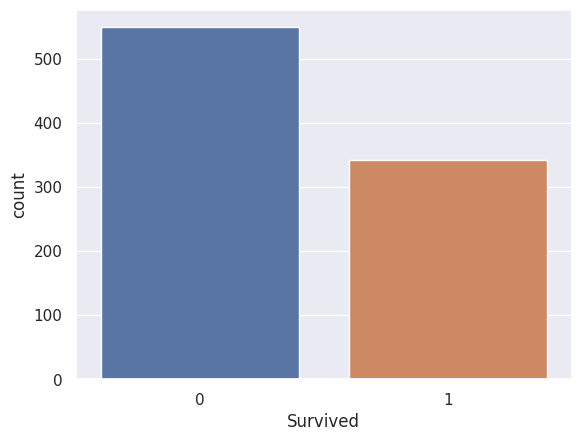

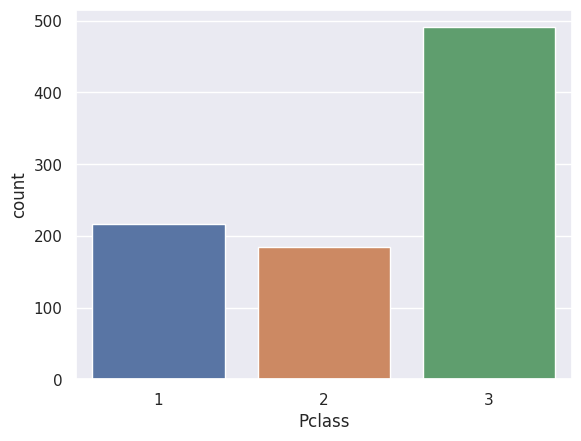

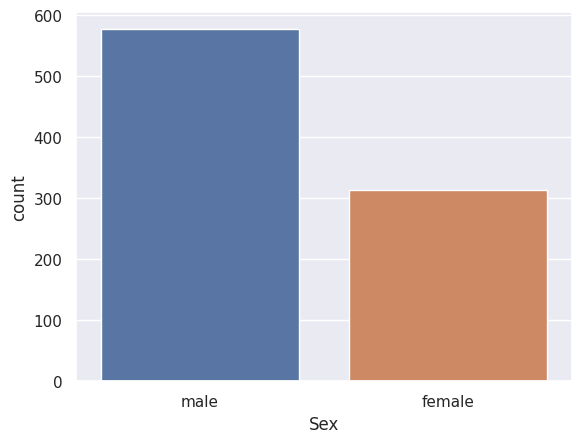

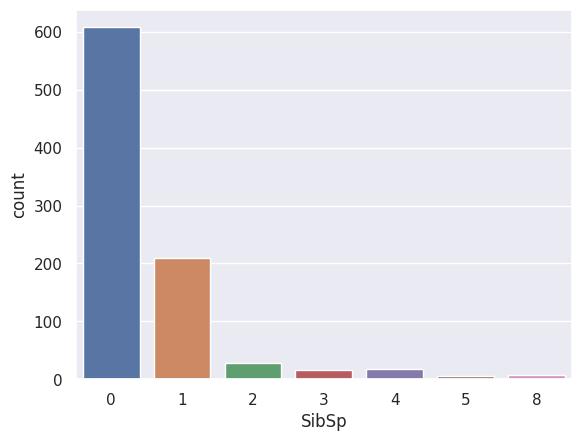

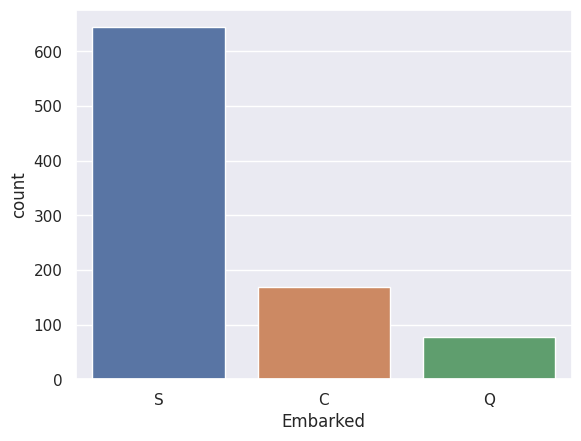

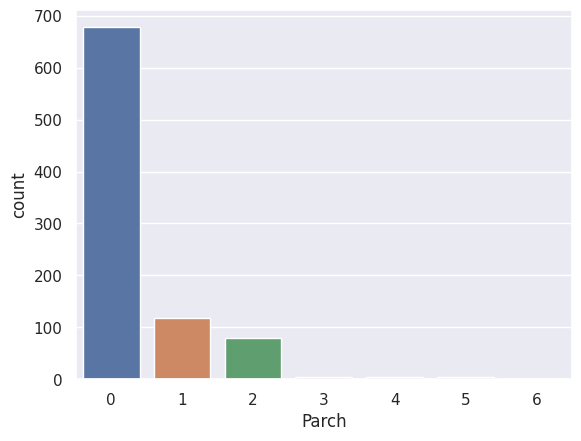

In [10]:
columns = ['Survived','Pclass','Sex','SibSp','Embarked', 'Parch']
for i in columns:
    count_plot(i)

<Axes: title={'center': 'Age'}, ylabel='Frequency'>

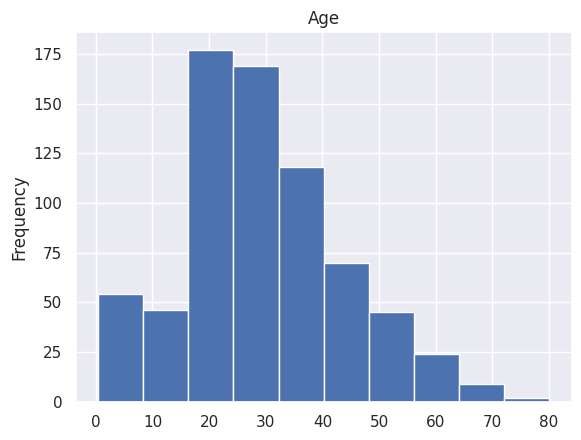

In [11]:
df["Age"].plot(kind='hist', title = "Age")


In [12]:
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [13]:
df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [14]:
# Show pie chart of survival rate
survived_counts = df['Survived'].value_counts().reset_index()
survived_counts.columns = ['Survived', 'Count']
fig = px.pie(survived_counts, values='Count', names=['No', 'Yes'], title='Survived', labels={'Count': 'Count'}, color = ['No', 'Yes'])
fig.update_traces(textposition='inside',  textinfo='percent+label+value')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide')
fig.show()

In [15]:
# Show histogram chart of survival counts by gender
fig1 = px.histogram(df, x='Sex', color='Survived', barmode='group', color_discrete_map={0: "red", 1: "blue"})
fig1.update_layout(title='Sex: Survived vs Dead')
fig1.show()

In [16]:
# Show histogram chart of survival counts by Pclass
fig2 = px.histogram(df, x='Pclass', color='Survived', barmode='group', title='Pclass: Survived vs Dead', labels={'Pclass': 'Pclass'}, color_discrete_map={0: 'red', 1: 'blue'})
fig2.update_layout(title='PClass: Survived vs Dead')
fig2.show()

# Data Preprocessing

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


drop unnecessary columns

In [18]:
df_clean = df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)
df_clean.shape

(891, 8)

In [19]:
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
df_clean.drop_duplicates(inplace=True)
df_clean.reset_index().shape

(780, 9)

In [21]:
# Fill missing values in age column by imputing the mean
df_clean['Age'].fillna(df['Age'].mean(), inplace=True)
df_clean.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [22]:
sex_map = {'male': 1, 'female': 2}
df_clean['Sex'] = df_clean['Sex'].map( sex_map).astype(int)

In [23]:
df_clean['Sex'].unique()

array([1, 2])

In [24]:
# Fill missing values in embarked column by imputing the mode
df_clean["Embarked"].fillna(df_clean["Embarked"].mode()[0], inplace=True)

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  780 non-null    int64  
 1   Pclass    780 non-null    int64  
 2   Sex       780 non-null    int64  
 3   Age       780 non-null    float64
 4   SibSp     780 non-null    int64  
 5   Parch     780 non-null    int64  
 6   Fare      780 non-null    float64
 7   Embarked  780 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 54.8+ KB


In [26]:
# Transform categorical data into numerical data manually as there are only 2 to 3 values for each column
Embarked_map = {'S': 1, 'C': 2, 'Q': 3}
df_clean['Embarked'] = df_clean['Embarked'].map(Embarked_map).astype(int)

In [27]:
df_clean['Embarked'].unique()

array([1, 2, 3])

In [28]:
## Remove Outliers 
for i in [i for i in df_clean.columns]:
    if df_clean[i].nunique()>=12:
        Q1 = df_clean[i].quantile(0.20)
        Q3 = df_clean[i].quantile(0.80)
        IQR = Q3 - Q1
        IQR = Q3 - Q1
        df_clean = df_clean[df_clean[i] <= (Q3+(1.5*IQR))]
        df_clean = df_clean[df_clean[i] >= (Q1-(1.5*IQR))]
df_clean = df_clean.reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  729 non-null    int64  
 1   Pclass    729 non-null    int64  
 2   Sex       729 non-null    int64  
 3   Age       729 non-null    float64
 4   SibSp     729 non-null    int64  
 5   Parch     729 non-null    int64  
 6   Fare      729 non-null    float64
 7   Embarked  729 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.7 KB


# Feature Exploring

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



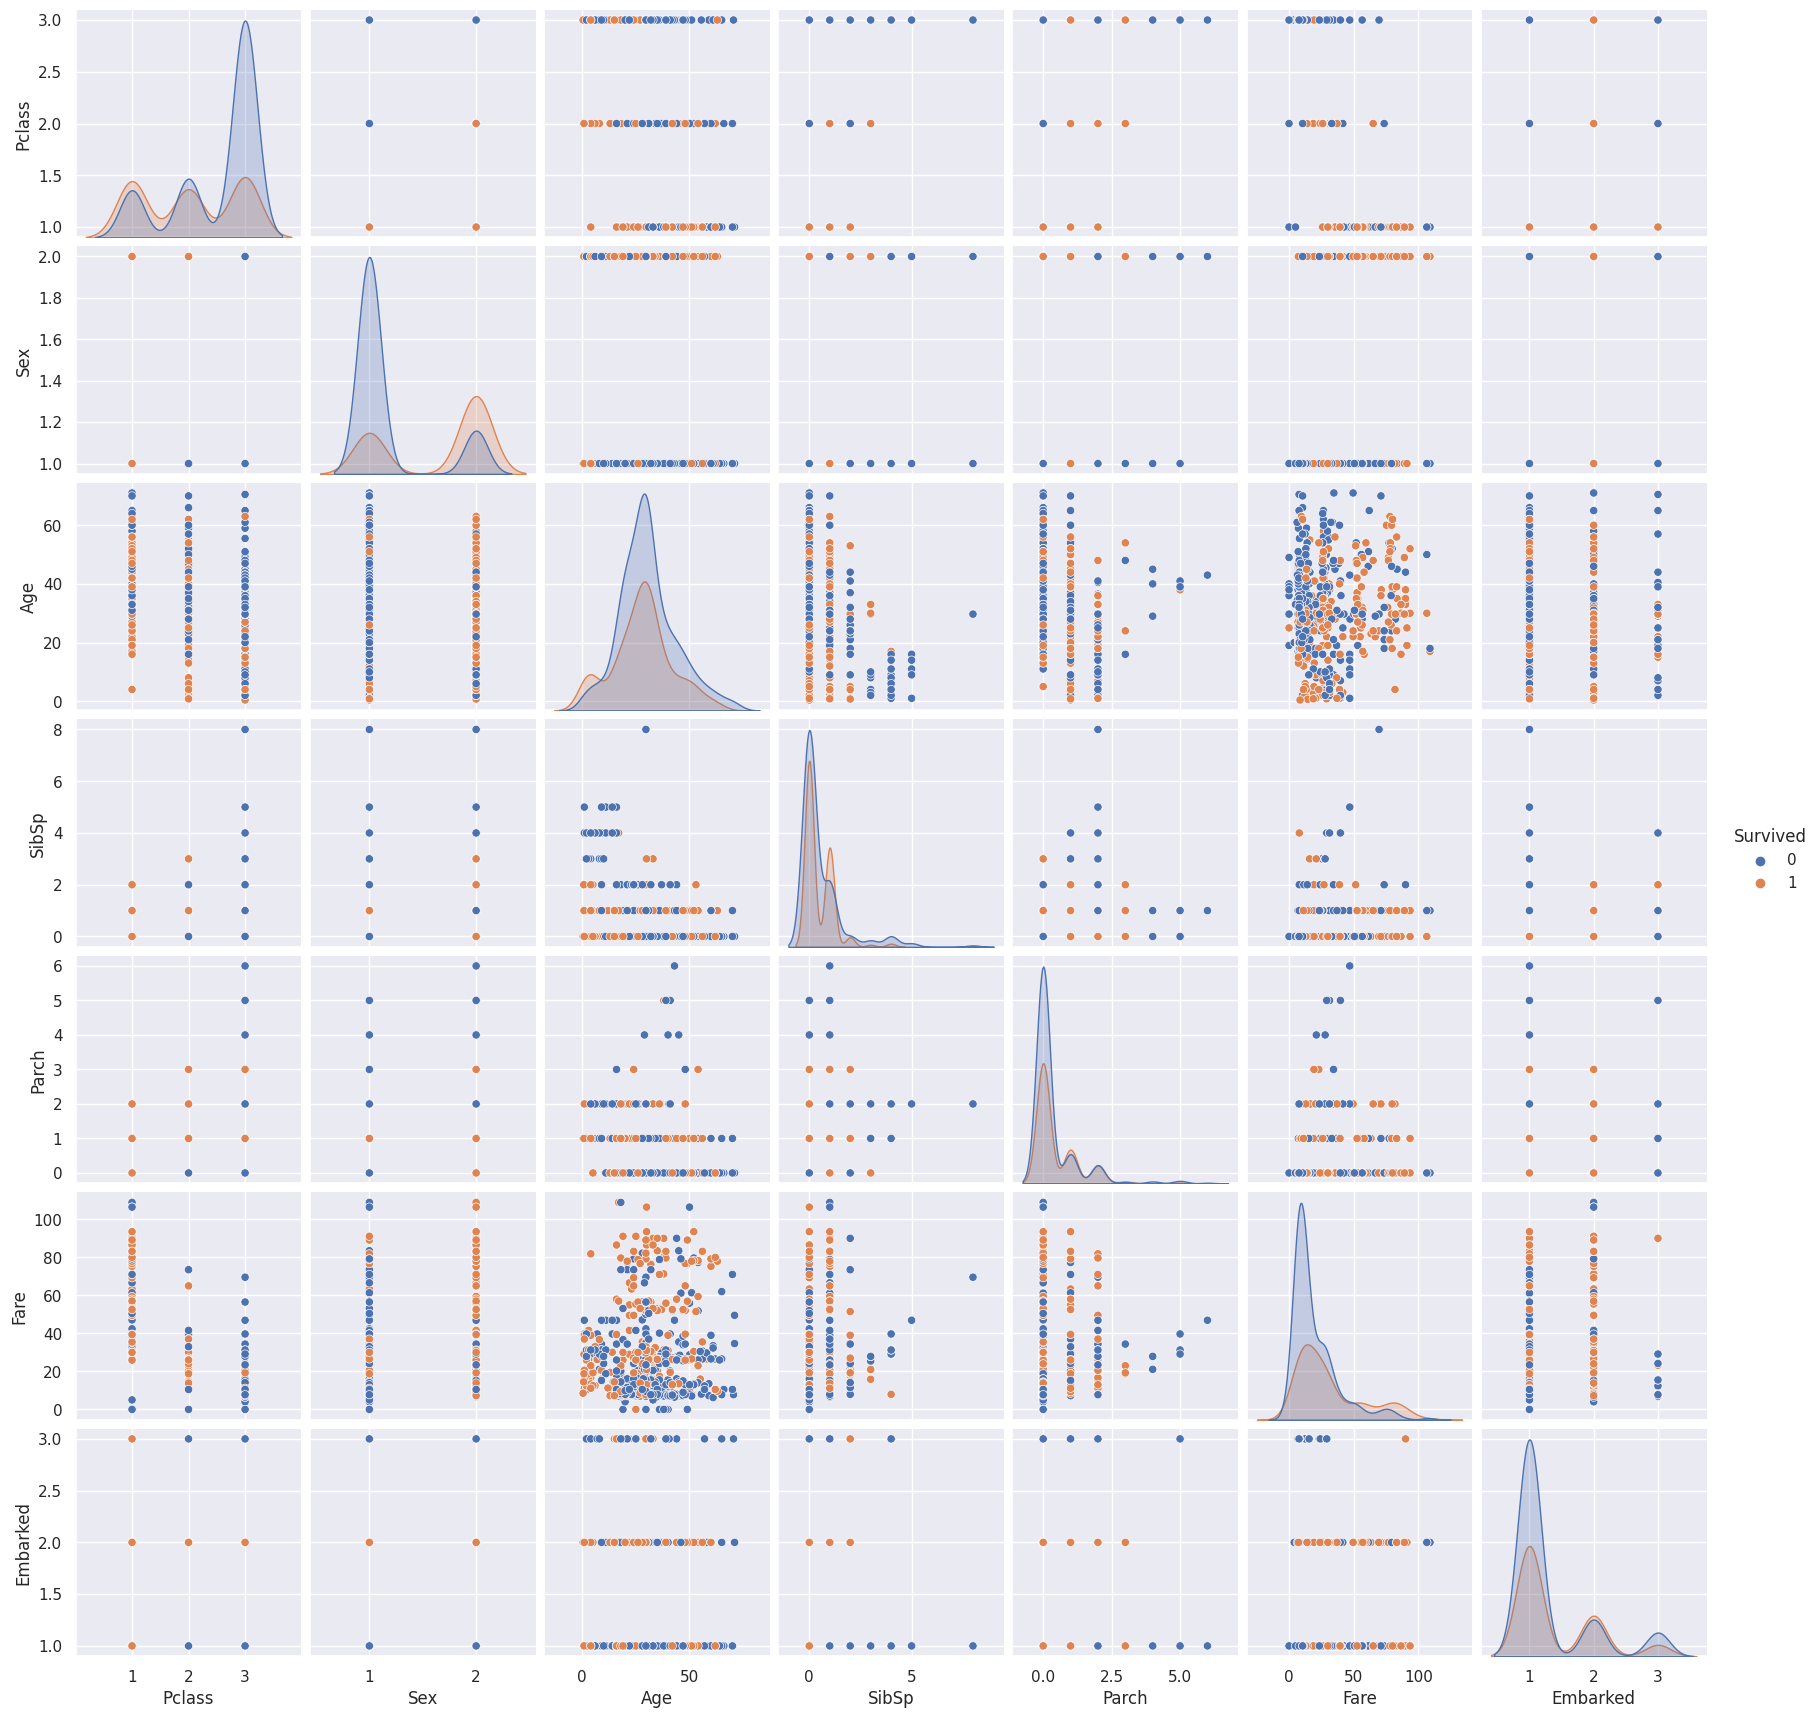

In [29]:
#Understanding the relationship between all the features
sns.pairplot(df_clean, hue='Survived')

<Axes: >

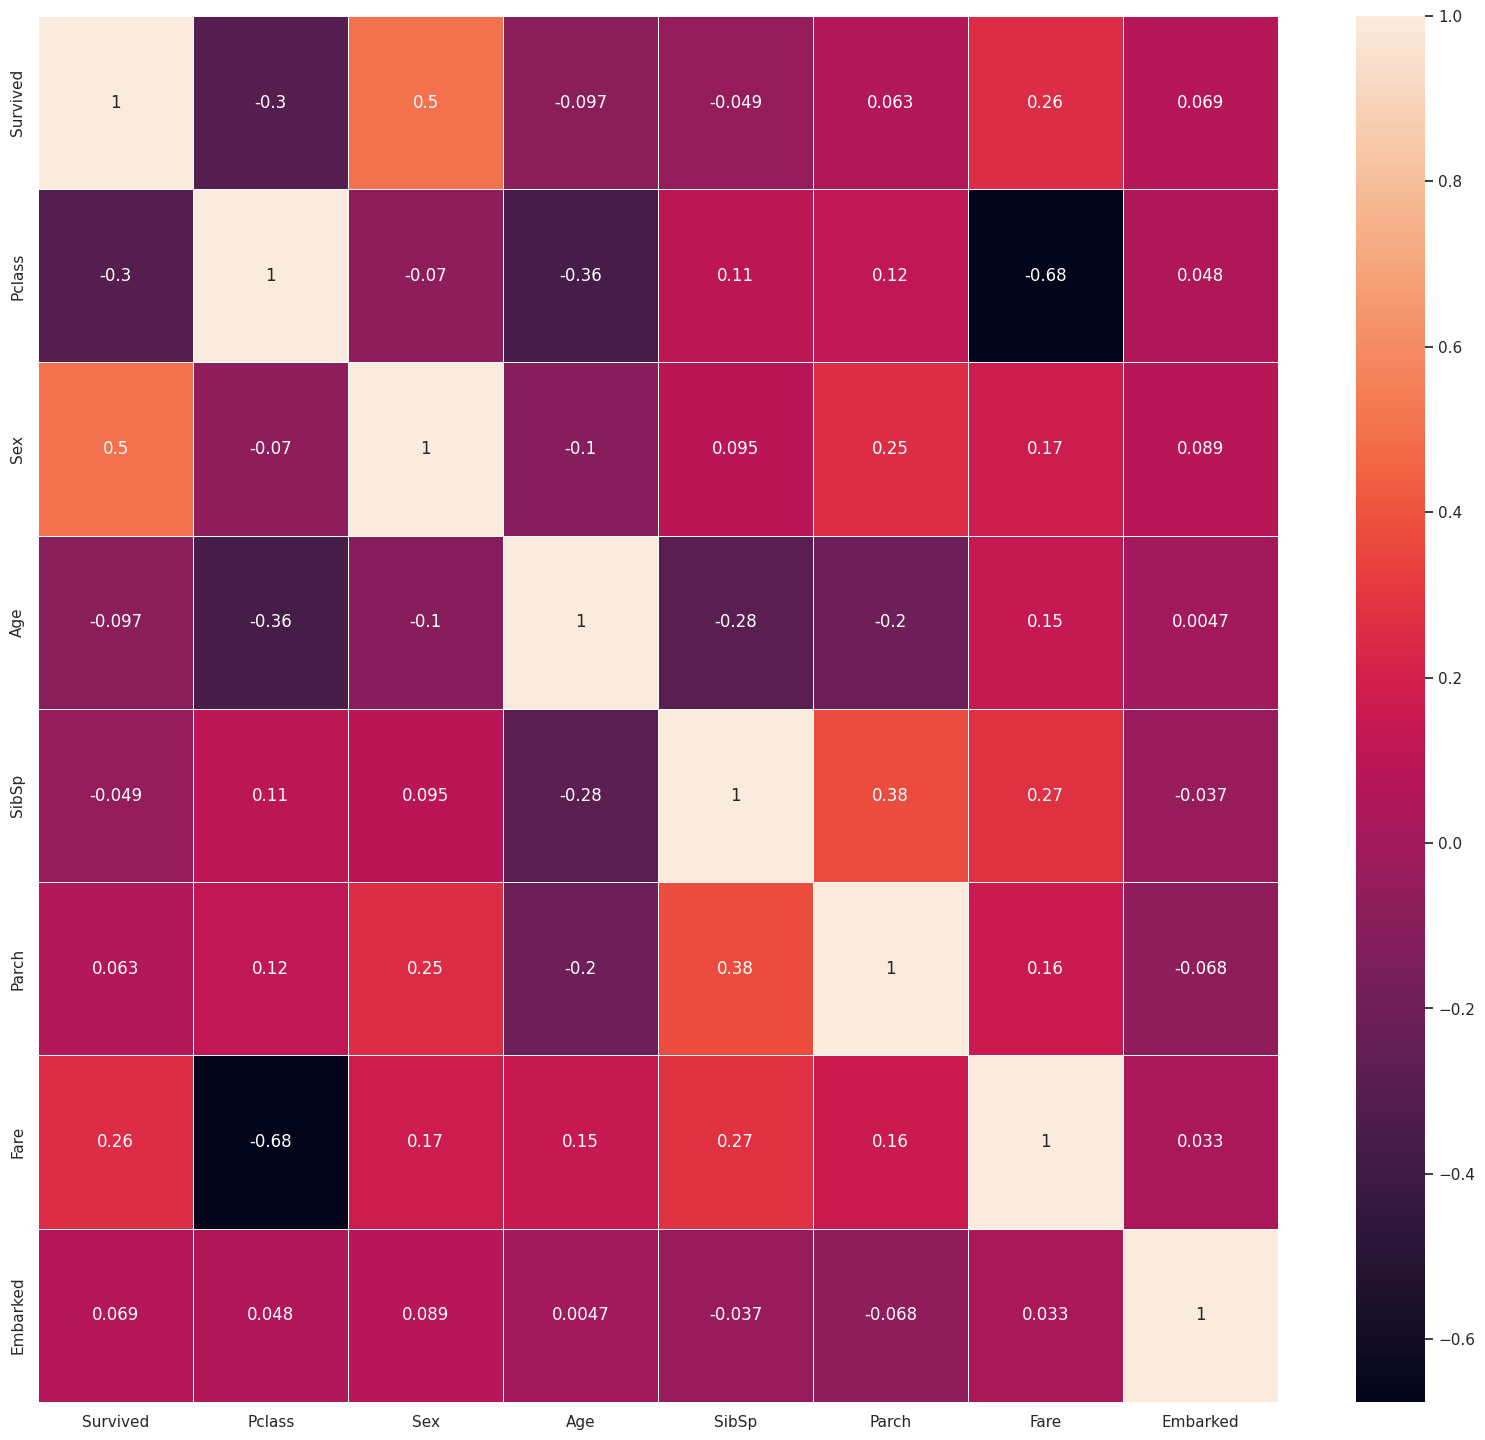

In [30]:
# Let's check the correlation between the variables 
plt.figure(figsize=(20,18)) 
sns.heatmap(df_clean.corr(), annot=True, linewidths=.5) 

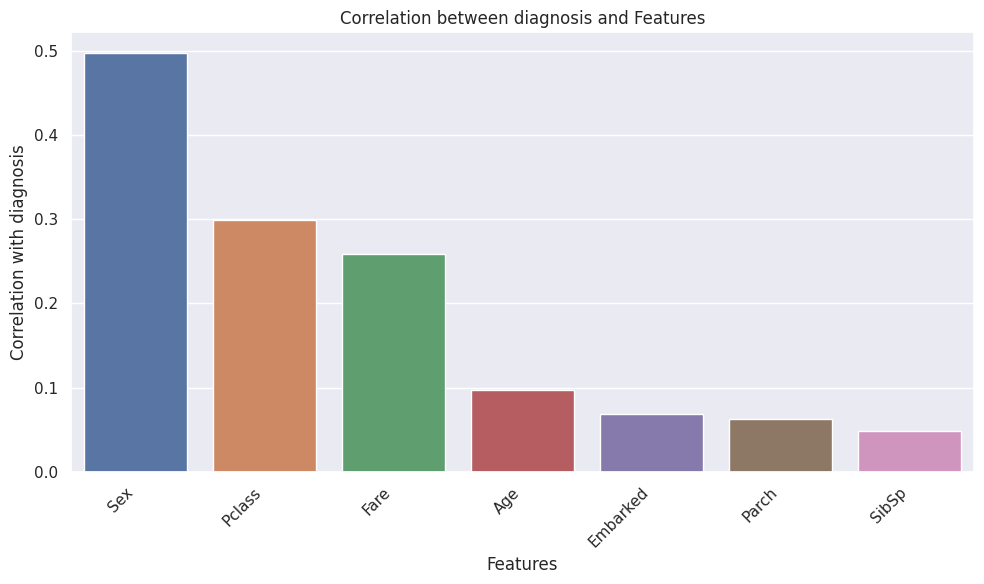

In [31]:
# Calculate the correlation list
target_corr = df_clean.corr()['Survived'].abs().sort_values(ascending=False)
# Create a bar chart to visualize the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Correlation with diagnosis')
plt.title('Correlation between diagnosis and Features')
plt.tight_layout()
plt.show()

# Modeling

## Splitting Data and Scaling it

In [32]:
X = df_clean.drop("Survived", axis=1)
y = df_clean["Survived"]

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=1)


'X' shape: (729, 7)
'y' shape: (729,)


In [33]:
#Feature Scaling (Standardization)
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test )

In [34]:
pd.DataFrame(X_train,columns = X.columns ).describe(include = 'all')

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02,5.830000e+02
mean,-2.346132e-16,1.614870e-16,5.636810e-17,-3.656309e-17,-3.656309e-17,-1.218770e-17,1.523462e-17
std,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00,1.000859e+00
min,-1.612715e+00,-7.475450e-01,-2.103149e+00,-5.116685e-01,-4.604007e-01,-1.103238e+00,-5.517331e-01
25%,-3.916593e-01,-7.475450e-01,-6.182943e-01,-5.116685e-01,-4.604007e-01,-7.380662e-01,-5.517331e-01
50%,8.293962e-01,-7.475450e-01,9.350395e-03,-5.116685e-01,-4.604007e-01,-4.454751e-01,-5.517331e-01
75%,8.293962e-01,1.337712e+00,4.639615e-01,4.695905e-01,-4.604007e-01,2.576507e-01,1.056569e+00
max,8.293962e-01,1.337712e+00,2.989225e+00,7.338404e+00,6.826846e+00,3.836788e+00,2.664871e+00


## Defining Scoring Function

In [35]:
def model_stats(y_pred, y_test):
    
    result = np.vstack((y_pred, y_test)).T
    #print(result)
    differences = np.count_nonzero(result.sum(axis = 1) == 1 )
    print('Wrong Predictions = ',differences)
    cm = confusion_matrix(y_test, y_pred)
    print(cm, '\n Accuracy Score = ',accuracy_score(y_test, y_pred))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression

In [37]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = classifier.predict(X_test)


Wrong Predictions =  31


[[75 15]
 [16 40]] 
 Accuracy Score =  0.7876712328767124


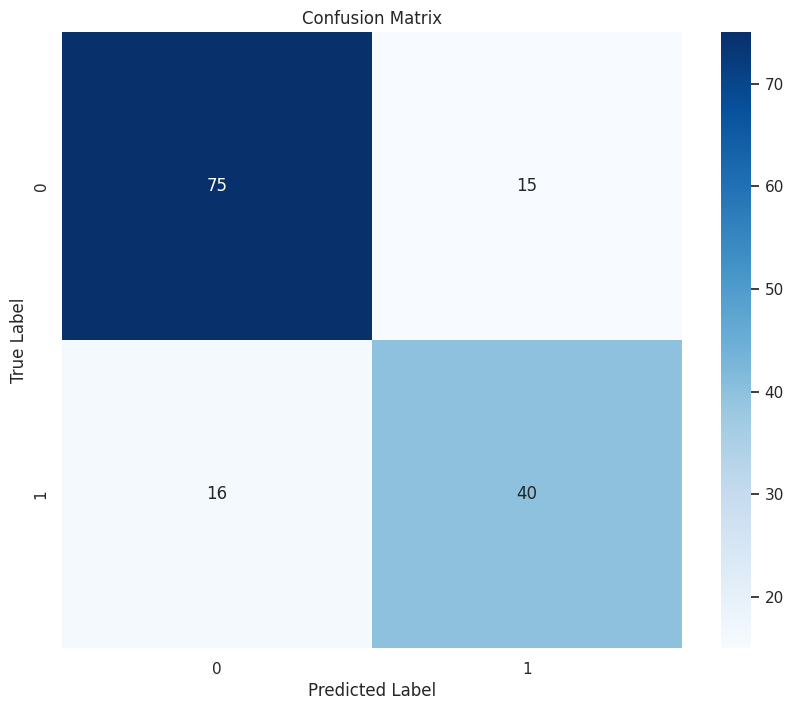

In [39]:
model_stats(y_test, y_pred)

### Logistic Regression using GridSearch 


In [40]:
# Create a grid of hyperparameter values
param_grid = {
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

# Create a logistic regression classifier
classifier = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Check if the best parameters have been set
if grid_search.best_params_ is not None:
    # Get the best hyperparameters
    best_params = grid_search.best_params_

    # Create a logistic regression classifier with the best hyperparameters
    classifier = LogisticRegression(**best_params)
    classifier.fit(X_train, y_train)
    # Evaluate the classifier on the test data
    y_pred = classifier.predict(X_test)
    
    model_stats(y_pred,y_test)
else:
    print('The best parameters have not been set yet.')


Accuracy: 0.7876712328767124


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


45 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

## KNN

Fitting 5 folds for each of 114 candidates, totalling 570 fits
Wrong Predictions =  26
[[85 20]
 [ 6 35]] 
 Accuracy Score =  0.821917808219178


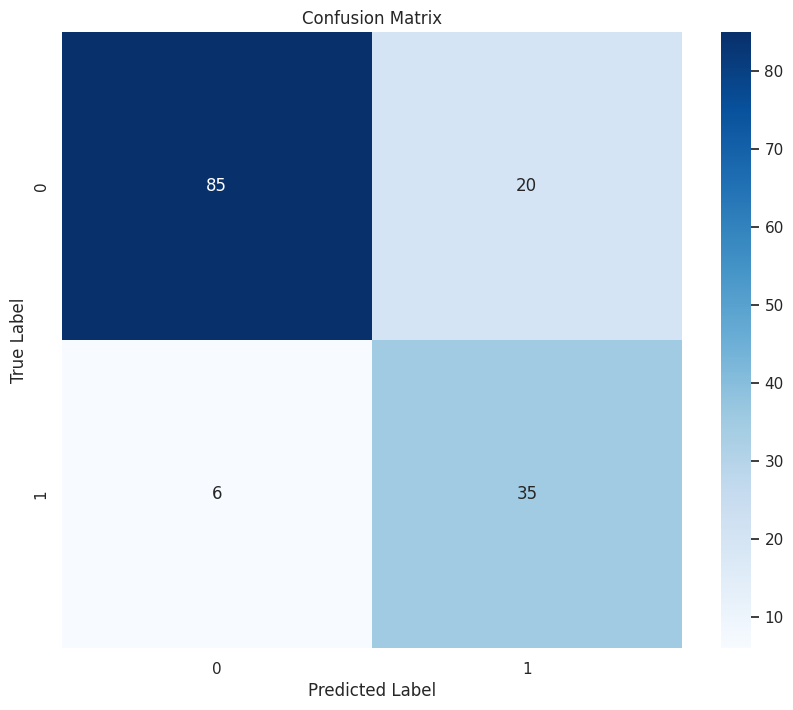

In [47]:
# Create a grid of hyperparameter values
param_grid = {
    "n_neighbors": [i for i in range(1,20, 1)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid,  refit=True, verbose=1, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a KNeighborsClassifier object with the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train,y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the predictions
model_stats(y_test,y_pred)


### KNN Minkowski Method

Fitting 5 folds for each of 684 candidates, totalling 3420 fits
Wrong Predictions =  26
[[81 16]
 [10 39]] 
 Accuracy Score =  0.821917808219178


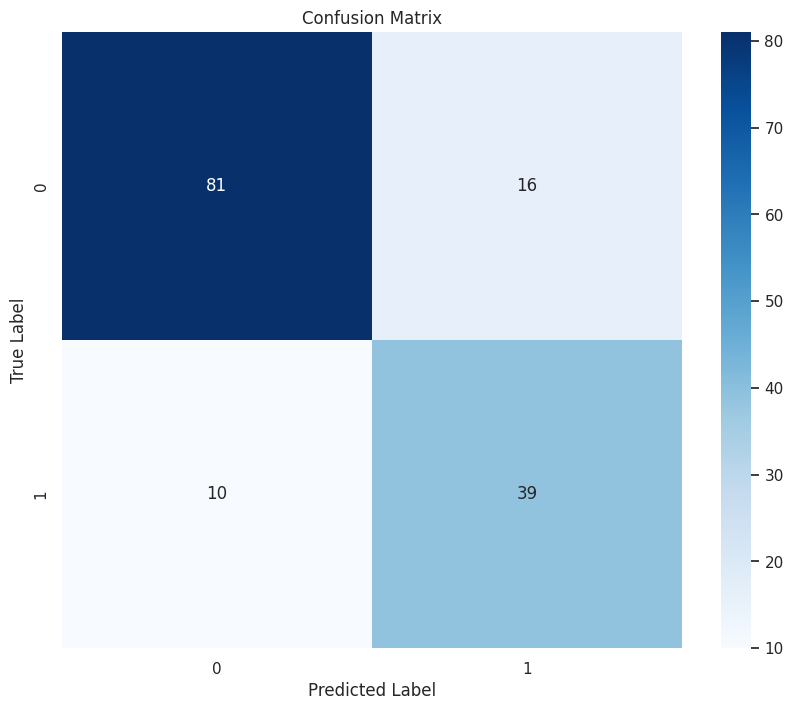

In [48]:
param_grid = {"n_neighbors": [i for i in range(1,20, 1)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 5, 10 ],
             "p": [1,2]}
# Create a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid,  refit=True, verbose=1, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a KNeighborsClassifier object with the best hyperparameters
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train,y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the predictions
model_stats(y_test,y_pred)


## Decision Tree

Wrong Predictions =  34
[[81 24]
 [10 31]] 
 Accuracy Score =  0.7671232876712328


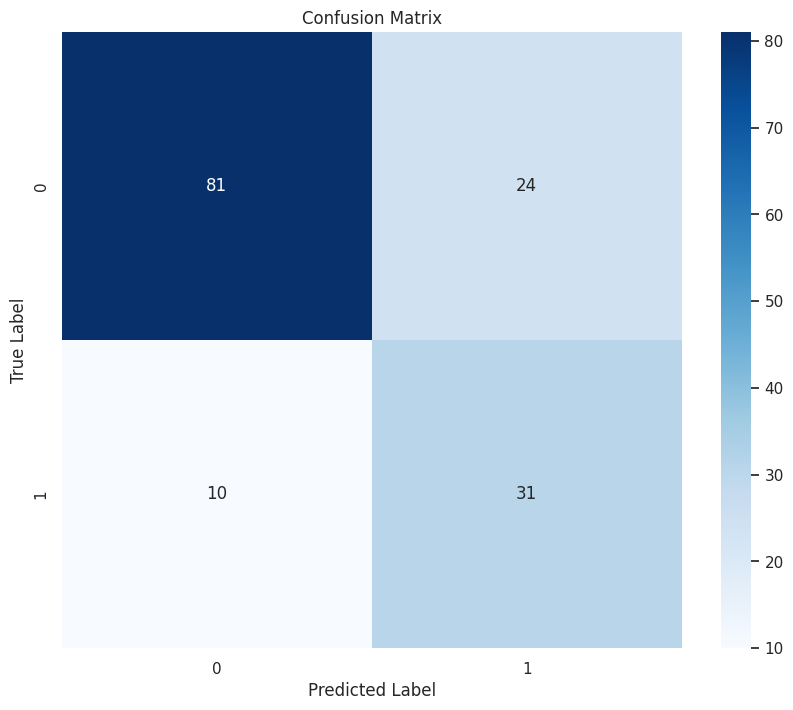

In [50]:
# Create a grid of hyperparameter values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, None],
    "max_features": [i for i in range(1, 10, 1)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [i for i in range(1, 5, 1)],
    'max_leaf_nodes': [None, 10, 20],
    'min_impurity_decrease': [1e-7, 1e-5, 1e-3]
}

# Create a decision tree classifier object
classifier = DecisionTreeClassifier(random_state = 0)

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a decision tree classifier object with the best hyperparameters
classifier = DecisionTreeClassifier(**best_params)
classifier.fit(X_train,y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the predictions
model_stats(y_test,y_pred)

## Random Forest

[[78 19]
 [13 36]] 
 Accuracy Score =  0.7808219178082192


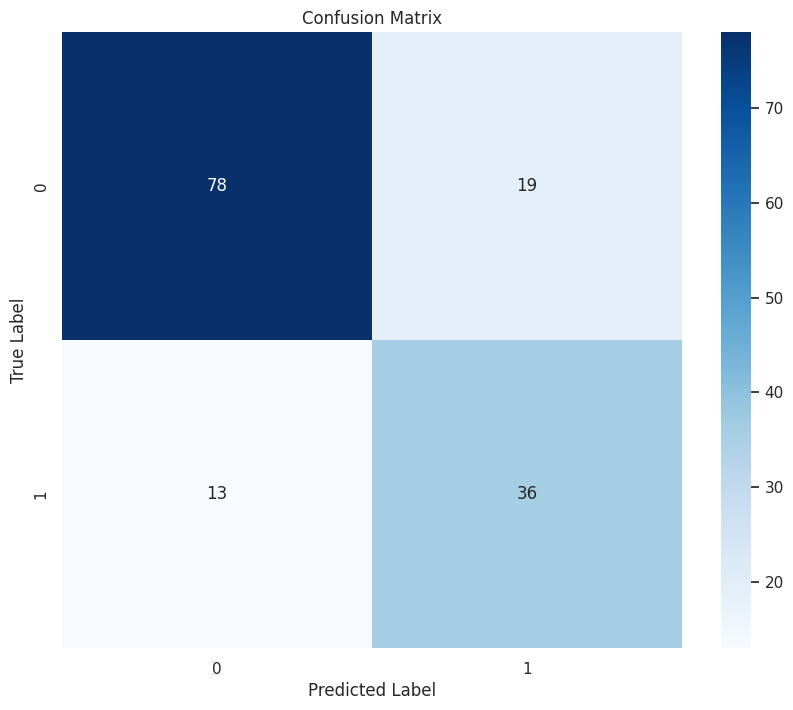

In [62]:
# Create a grid of hyperparameter values
param_grid = {'bootstrap': [True, False],
    'n_estimators': [30,50,100],
    'max_depth': [10, 50, 100, None],
    'min_samples_split': [2, 5, 15, 30],
    'min_samples_leaf': [1, 3, 5, 10]
}

# Create a RandomForestClassifier object
classifier = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a RandomForestClassifier object with the best hyperparameters
classifier = RandomForestClassifier(**best_params)
classifier.fit(X_train,y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the predictions
model_stats(y_test,y_pred)

## Kernal SVM

[[80 18]
 [11 37]] 
 Accuracy Score =  0.8013698630136986


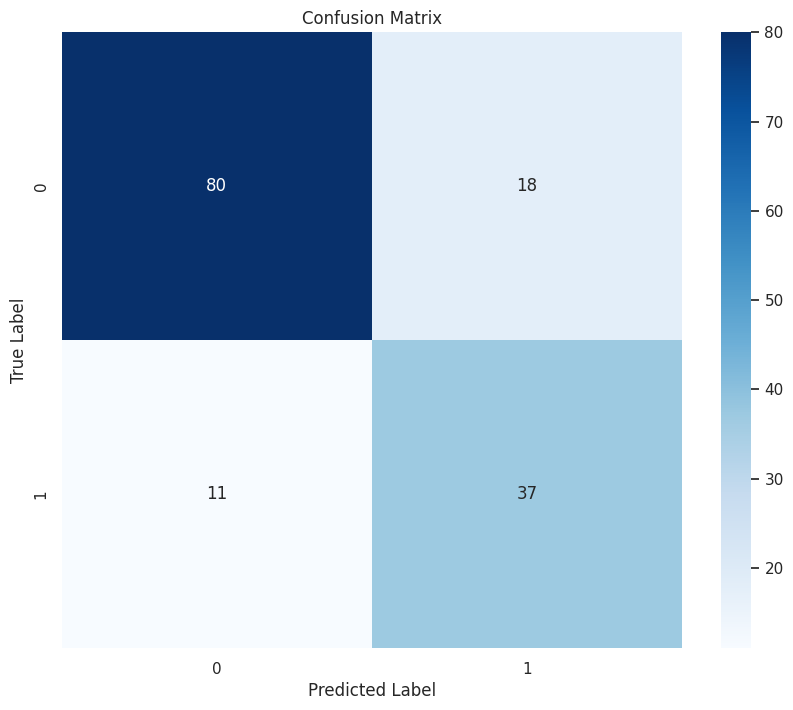

In [60]:
from sklearn.svm import SVC

# Create a grid of hyperparameter values
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Create a SVC object
classifier = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a SVC object with the best hyperparameters
classifier = SVC(**best_params)
classifier.fit(X_train,y_train)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the predictions
model_stats(y_test,y_pred)


## Conclusion
The KNN is the best Model with the highest accuracy among the others 